In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all = pd.read_csv('Production_Crops_Livestock_E_All_Data_Normalized_2.csv')
all.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


In [3]:
# Area contains all countries first, sorted alphabetically, then further areas that will need to be deleted for further country-based analysis
# define cutoff index
#cutoff = max(all.index[all.Area == 'Zimbabwe'].to_list()) -> this worked once, but doesn't anymore :-(
# so here is an alternative, based on the assumption that the last index is also the highest
z_list = all.index[all.Area == 'Zimbabwe'].to_list()
cutoff = z_list[len(z_list)-1]
# drop all rows whose index is bigger than the cutoff
all.drop(all[all.index > cutoff].index, inplace = True)

In [4]:
# dataset contains total for China and separate values for mainland, Hong Kong etc. -> drop China total
all.drop(all[all.Area == 'China'].index, inplace=True)

In [5]:
# some item categories contain totals of subcategories -> drop totals
all = all[~all.Item.str.contains(', Total')]

In [6]:
# consider categories with 'Primary' to be grouping other subcategories -> drop them
all = all[~all.Item.str.contains('Primary')]

In [7]:
# replace null values with 0
all = all.fillna('0')

In [8]:
# select only production data
all = all[all.Element == 'Production'][['Area', 'Item', 'Year', 'Value']].reset_index(drop=True)

In [9]:
all['Value'] = all.Value.astype(np.float64)

In [10]:
# TO CSV
# all_production_quiz = all.to_csv('all_production_quiz.csv')

In [11]:
all_positive = all.query('Value > 0')

In [12]:
# TO CSV
# all_positive_csv = all_positive.to_csv('all_positive.csv')

In [13]:
# create smaller dataset with only numbers from the 2000s
all_positive_small = all_positive[all_positive.Year > 2000].reset_index(drop=True)

In [14]:
# TO CSV
# export csv with only numbers from the 2000s
all_production_quiz_small = all_positive_small.to_csv('all_production_quiz_small.csv')

In [15]:
areas = all_positive_small['Area'].unique()
years = all_positive_small['Year'].unique()

In [18]:
# to check the number of observations per country and year
# this query takes quite some time to run
areazz = []
yearzz = []
shapezz = []
for a in areas:
    for y in years:
        areazz.append(a)
        yearzz.append(y)
        shapezz.append(all_positive_small[all_positive_small.Area == a][all_positive_small.Year == y].sort_values('Value', ascending=False).shape[0])

C:\Users\1\AppData\Local\Temp\ipykernel_64776\1796551371.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shapezz.append(all_positive_small[all_positive_small.Area == a][all_positive_small.Year == y].sort_values('Value', ascending=False).shape[0])


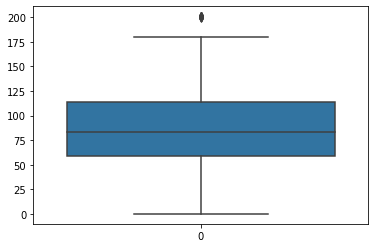

In [19]:
# some countries seem to have really few observations in some years
sns.boxplot(data=shapezz)
plt.show()

In [20]:
# show the country-year-combinations with the fewest observations
overviewzz = pd.concat([pd.Series(areazz), pd.Series(yearzz), pd.Series(shapezz)], axis = 1)
overviewzz.columns = ['Area', 'Year', 'No of observations']
overviewzz[(overviewzz['No of observations'] > 0)&(overviewzz['No of observations'] < 4)].sort_values('No of observations').head(40)

,Area,Year,No of observations
2260,Marshall Islands,2001,3
2277,Marshall Islands,2018,3
2276,Marshall Islands,2017,3
2275,Marshall Islands,2016,3
2274,Marshall Islands,2015,3
2273,Marshall Islands,2014,3
2272,Marshall Islands,2013,3
2271,Marshall Islands,2012,3
2270,Marshall Islands,2011,3
2269,Marshall Islands,2010,3


In [21]:
overviewzz.groupby('No of observations').agg('count').head(10)

,Area,Year
No of observations,,
0,112,112
3,20,20
11,24,24
12,12,12
13,1,1
14,19,19
15,2,2
16,42,42
21,7,7


In [22]:
all_positive_small[['Area', 'Year']].drop_duplicates().groupby('Area')['Year'].agg('count').sort_values().head(12)

Area
Serbia and Montenegro     5
Guadeloupe                6
Réunion                   6
French Guyana             6
Martinique                6
South Sudan               9
Sudan                     9
Sudan (former)           11
Serbia                   15
Montenegro               15
Paraguay                 20
Niger                    20
Name: Year, dtype: int64

Check and prepare code for the app

In [23]:
countries = all.Area.unique()
years = all.Year.unique()
years.sort()

In [24]:
# set a country and a year as input for the quiz
country = 'Guadeloupe'
year = 2006

In [25]:
selection = all[all.Area == country][all.Year == year]

C:\Users\1\AppData\Local\Temp\ipykernel_64776\3884642712.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selection = all[all.Area == country][all.Year == year]


In [27]:
selection = selection[['Item', 'Value']][selection.Value > 0.0].sort_values(by='Value').set_index('Item')
selection

,Value
Item,
"Fat, sheep",1.0
"Offals, horses",2.0
"Fat, goats",3.0
"Meat, duck",4.0
"Skins, sheep, fresh",8.0
...,...
"Vegetables, fresh nes",20000.0
Molasses,25000.0
Bananas,52250.0


In [28]:
# get the maximum value
max = selection[selection.Value == selection.Value.max()]
max.index

Index(['Sugar cane'], dtype='object', name='Item')

In [29]:
# drop the maximum value from the series of other values to avoid duplicates
selection_min = selection.drop(index=max.index)

In [30]:
# get 3 sample values if the number of observations allows, otherwise just take whatever is there
if len(selection_min) > 2:
    sample = selection_min.sample(n=4-len(max))
else:
    sample = selection_min

In [31]:
# create random order
shuffler = []
for i in range(len(sample)+1):
    shuffler.append(i)
random.shuffle(shuffler)
shuffler

[2, 3, 0, 1]

In [32]:
# create list for the quiz: 1 maximum value + 3 random other values
quiz = sample.append(max)
quiz

C:\Users\1\AppData\Local\Temp\ipykernel_64776\2723643031.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiz = sample.append(max)


,Value
Item,
"Meat, duck",4.0
"Meat, cattle",2647.0
Beef and Buffalo Meat,2647.0
Sugar cane,787286.0


In [33]:
# shuffle the order
quiz['order'] = shuffler
quiz

,Value,order
Item,,
"Meat, duck",4.0,2
"Meat, cattle",2647.0,3
Beef and Buffalo Meat,2647.0,0
Sugar cane,787286.0,1


In [34]:
# introduce a "default" option on to which the initial selection of the radio buttons is set (this is just how streamlit's radio button works...)
quiz = quiz.reset_index()
default = [{'Item': 'default' ,'Value': 0, 'order': -1}]
quiz = quiz.append(default).sort_values('order').set_index('Item')
quiz

C:\Users\1\AppData\Local\Temp\ipykernel_64776\1571018989.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quiz = quiz.append(default).sort_values('order').set_index('Item')


,Value,order
Item,,
default,0.0,-1
Beef and Buffalo Meat,2647.0,0
Sugar cane,787286.0,1
"Meat, duck",4.0,2
"Meat, cattle",2647.0,3


In [35]:
choice = 'Sugar cane'

In [38]:
if quiz[quiz.index == choice]['Value'][0] == quiz.Value.sort_values(ascending=False)[0]:
    print('You got it!')
elif choice == 0:
    print('You need to select one of the crops.')
else:
    print('Not really.')

You got it!
